In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from wavelets import *
from draws import *
from chaos_searh import *
from BP_dynamics import *
import pywt
plt.rcParams.update({'font.size': 25})

## Определение параметров системы:

In [53]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

# Решение системы ФХН при фиксированном параметре $Bbp = 0.08$ и изменении $Bpb = 0.15-0.25$

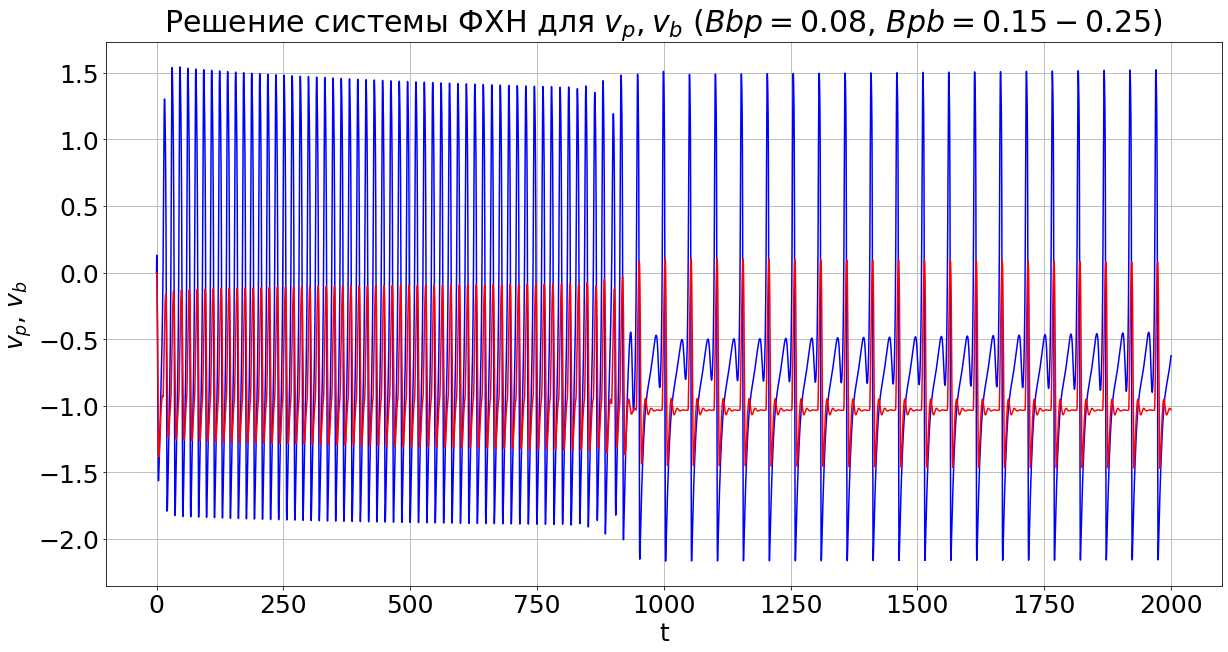

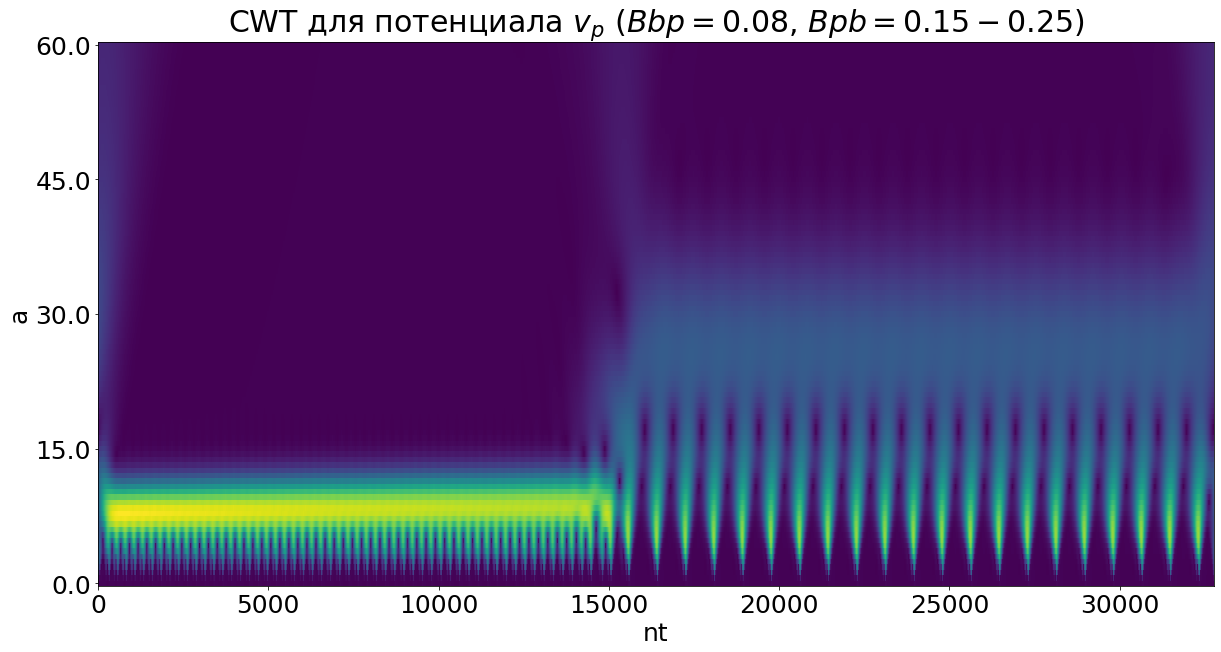

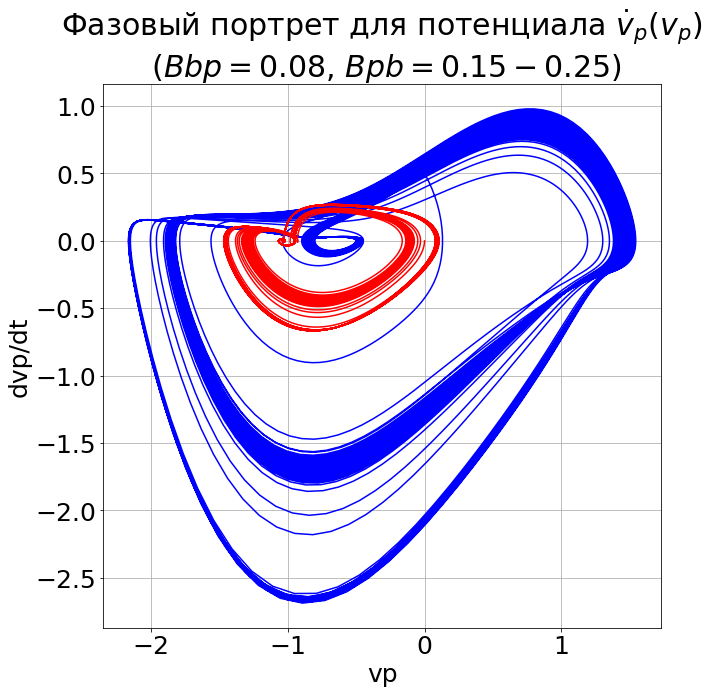

In [83]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

## Далее следует исследование области при $B_{bp} = 0.08$ и $B_{pb} = 0.185-0.189$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)
## Вроде как через хаос переход от 2,1b к 2 на графике, но не похоже

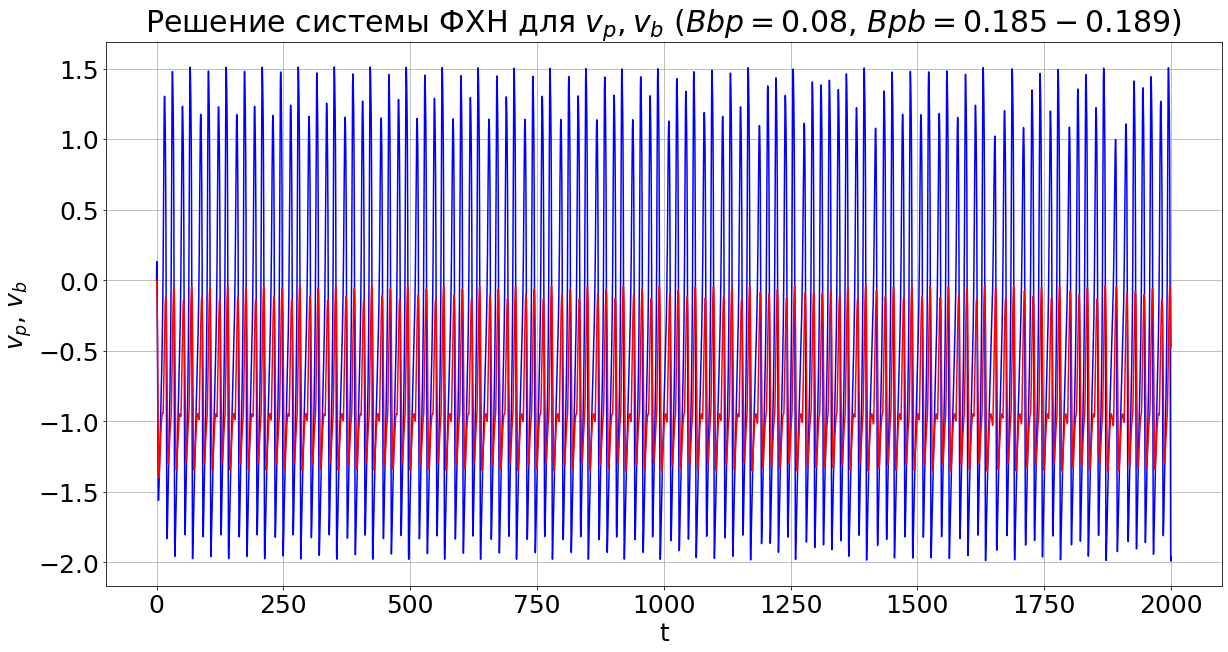

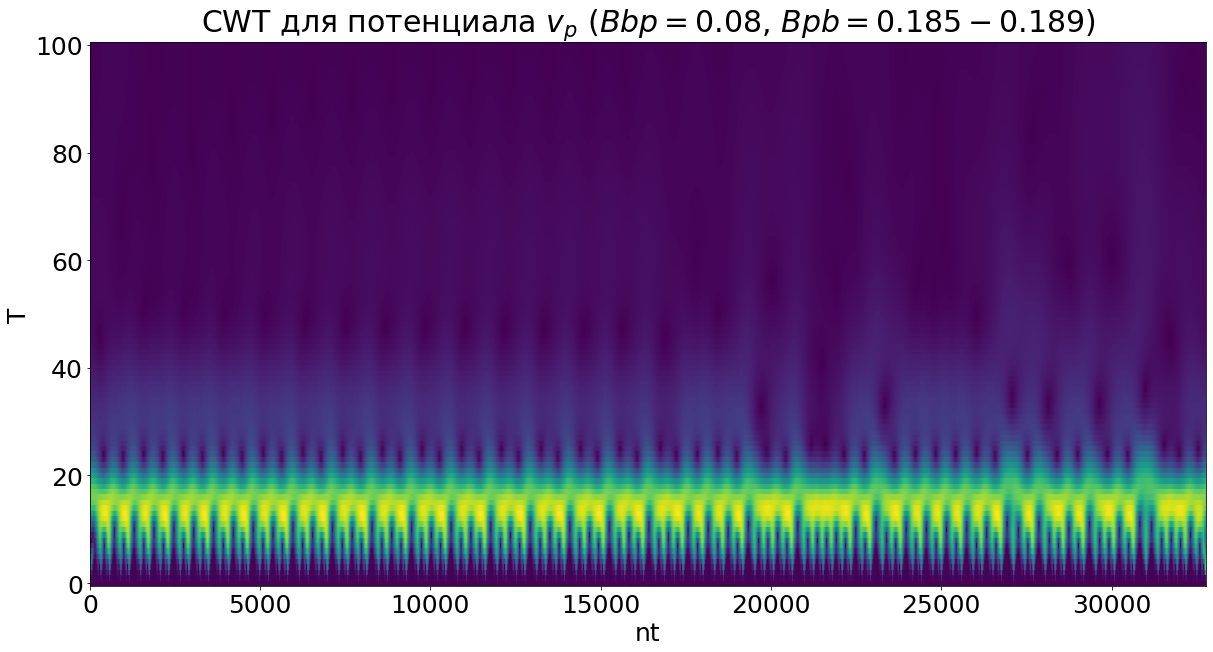

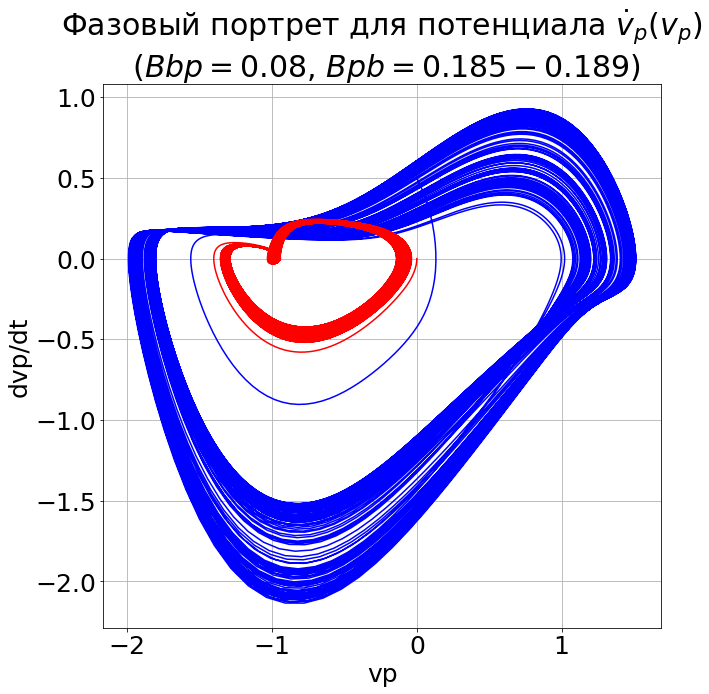

In [58]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.185 # синаптический параметр
Bpbmax = 0.189 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

wavelet_draw(args2, scale, ts=2000, nt=2**15)

phase_portrait(args2, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**15)

## Далее рассчитаем показатель Ляпунова: в целом, вроде растет, хоть и медленно, стоит ли собрать статистику? или может рассчитать и нарисовать автокорелляционную функцию и ее поведение на больших временах? Наверное.

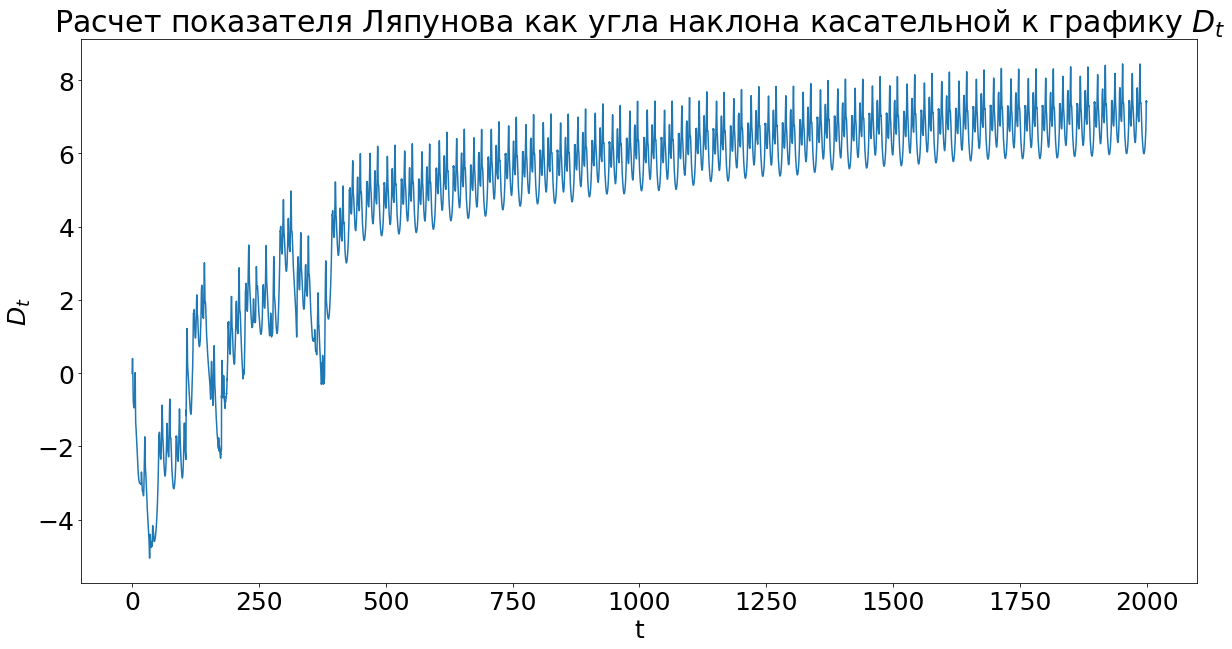

In [63]:
Bbp = 0.08 # синаптический параметр
Bpb = 0.18
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

sol, t = calcODE(args, 0, 0, 0, 0, 0, 0, ts=3000, nt=2**15)
ts = 3000
sol1, t = calcODE(args, *sol[-1], nt=2**15)
sol2, t = calcODE(args, *(sol[-1] - [0.0000001, 0, 0, 0, 0, 0]), nt=2**15)

plt.figure(figsize=(20, 10))
plt.plot(t, np.log(np.linalg.norm(sol1 - sol2, axis=1) / np.linalg.norm(sol1[0] - sol2[0])))
plt.title("Расчет показателя Ляпунова как угла наклона касательной к графику $D_t$")
plt.xlabel("t")
plt.ylabel("$D_t$")
plt.show()
# plt.plot(t, np.log(np.abs(sol1[:, 0] - sol2[:, 0]) / np.linalg.norm(sol1[0] - sol2[0])))
# plt.show()


## Найдем характерные периоды колебаний аттракторов: гистограммы ниже по порядку: область до предполагаемого хаоса, область хаоса и область после хаоса для параметров B

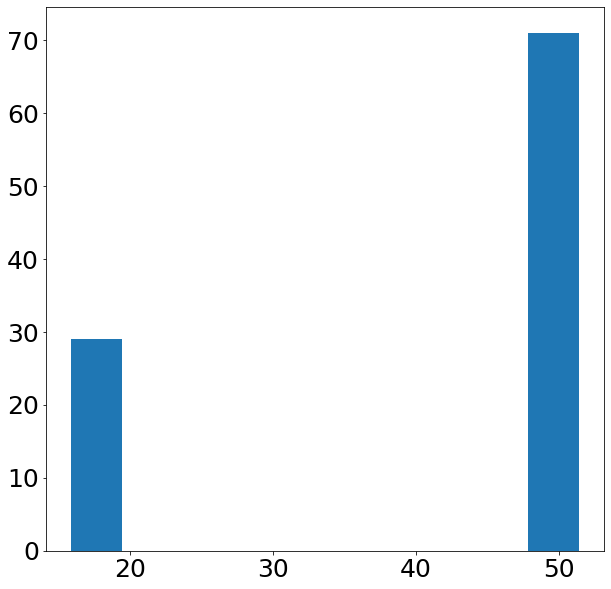

In [76]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.16 # синаптический параметр
Bpbmax = 0.16 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

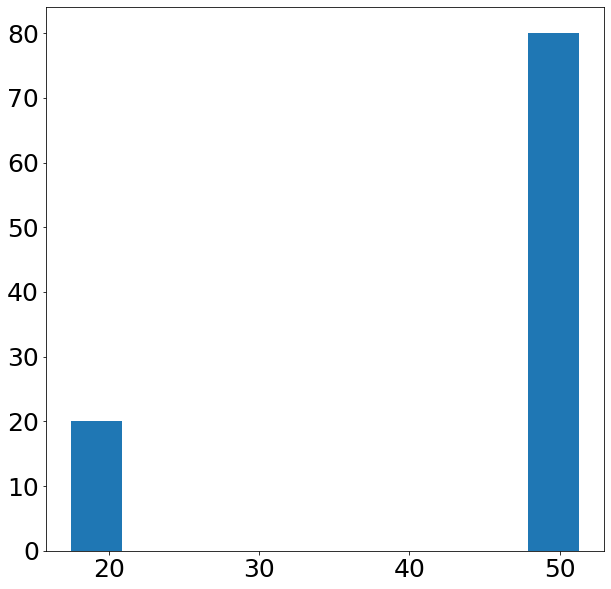

In [84]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.183 # синаптический параметр
Bpbmax = 0.183 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

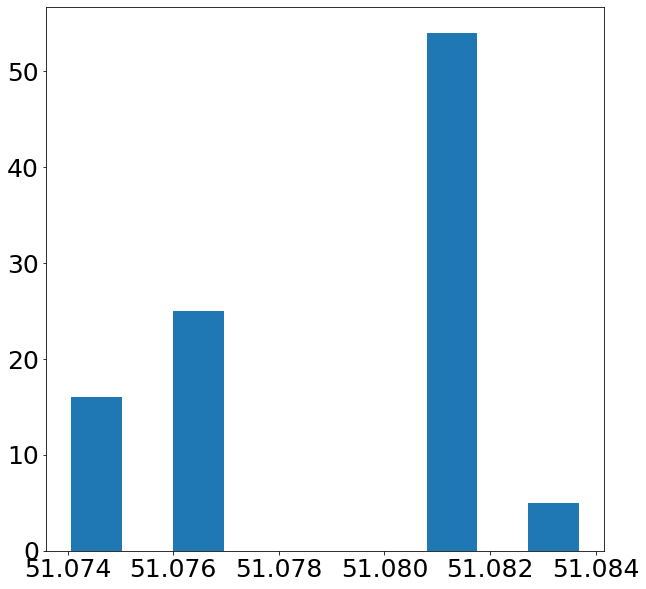

In [74]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.21 # синаптический параметр
Bpbmax = 0.21 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

## Построим траектории для разных начальных условий для $v_p$: для всех положительных одинаковое поведение системы как описано выше, для отрицательных условий переходов нет

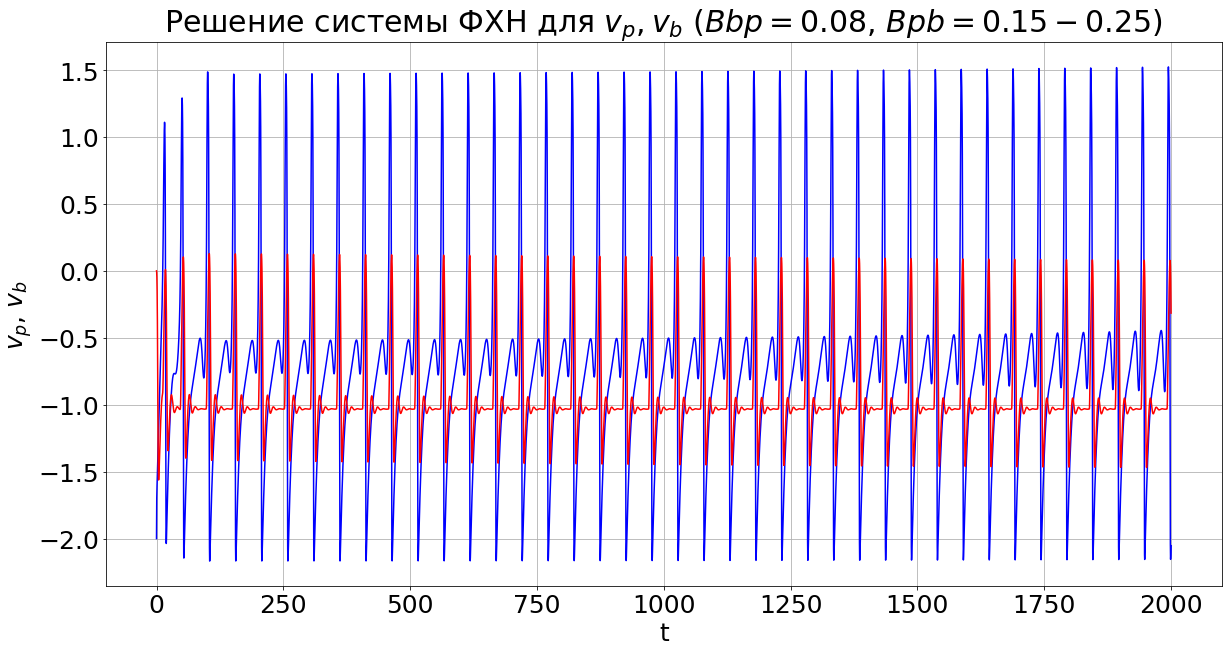

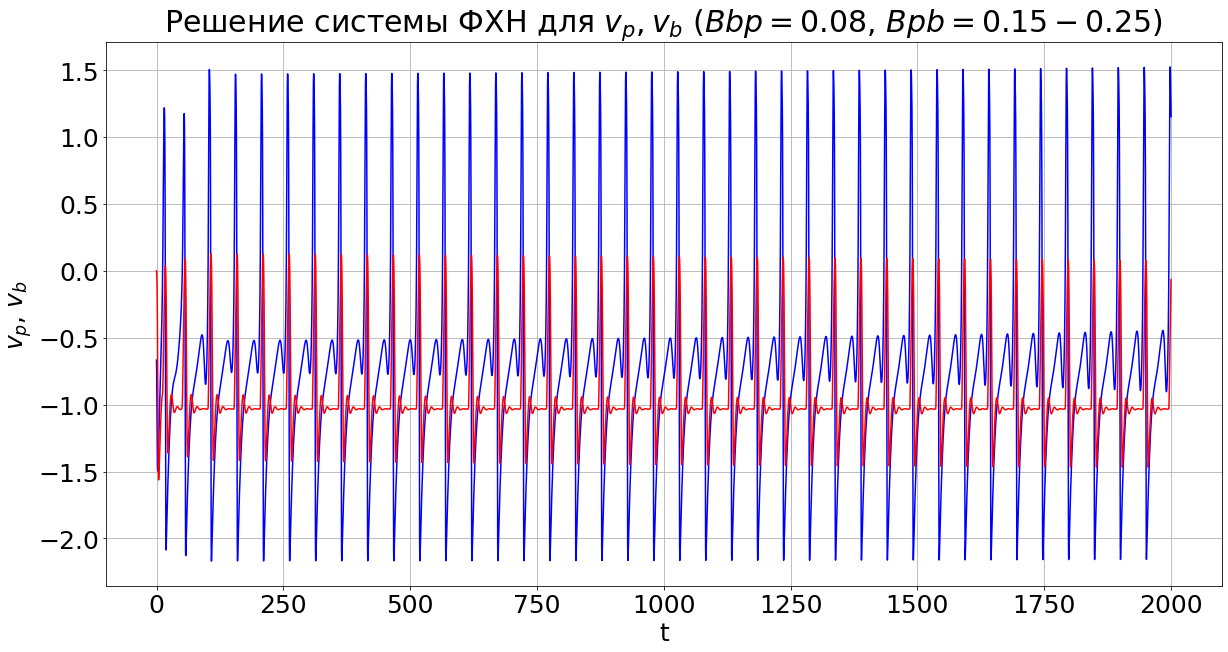

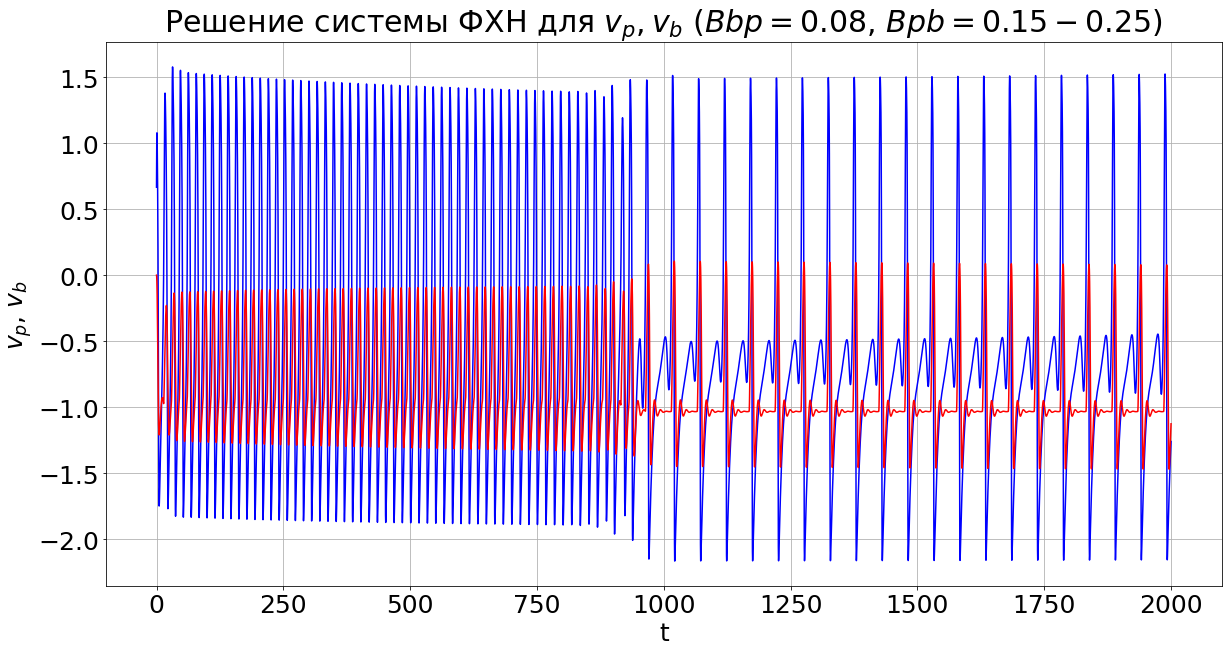

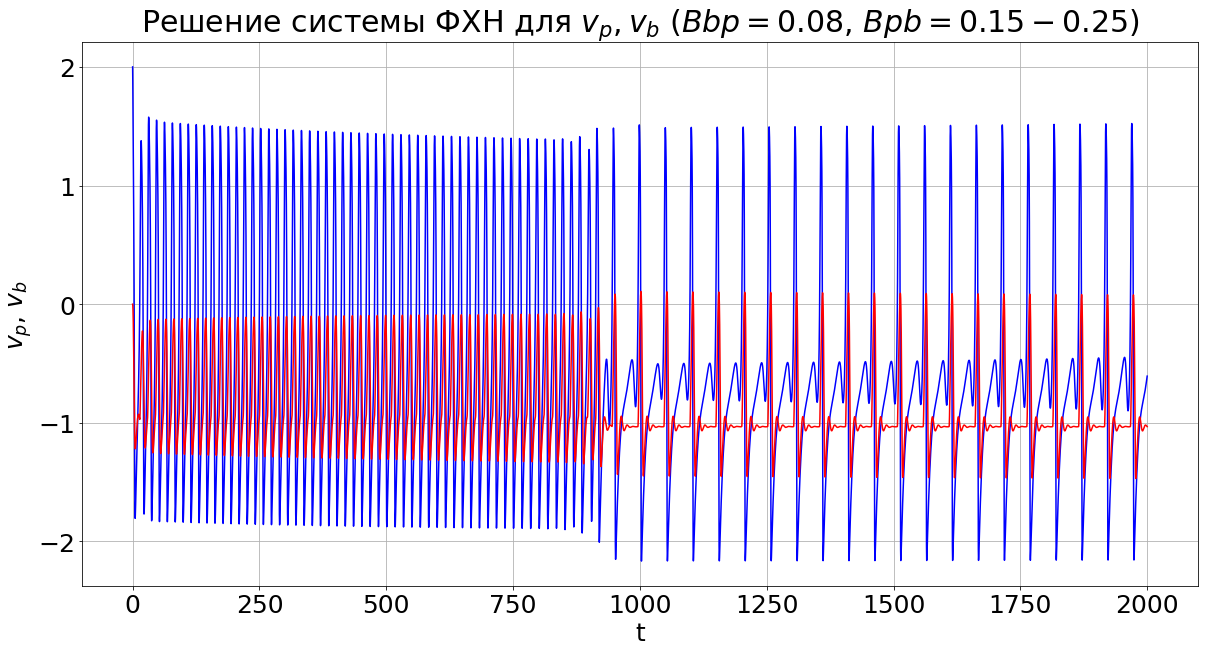

In [69]:
Bbp = 0.08 # синаптический параметр
Bpbmin = 0.15 # синаптический параметр
Bpbmax = 0.25 # синаптический параметр
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

vp0s = np.linspace(-2, 2, 4)
for vp0 in vp0s:
    signal_draw2(args2, vp0, ts=2000, nt=2**15)